In [27]:
import numpy as np
import pandas as pd
from pandas import plotting
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [28]:
data = pd.read_csv('digits.csv')

In [29]:
print(data)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2, random_state=27)
scaled_data = StandardScaler().fit_transform(
    X=data.drop(["label"], axis=1)
)
pca_data = pca.fit_transform(scaled_data)

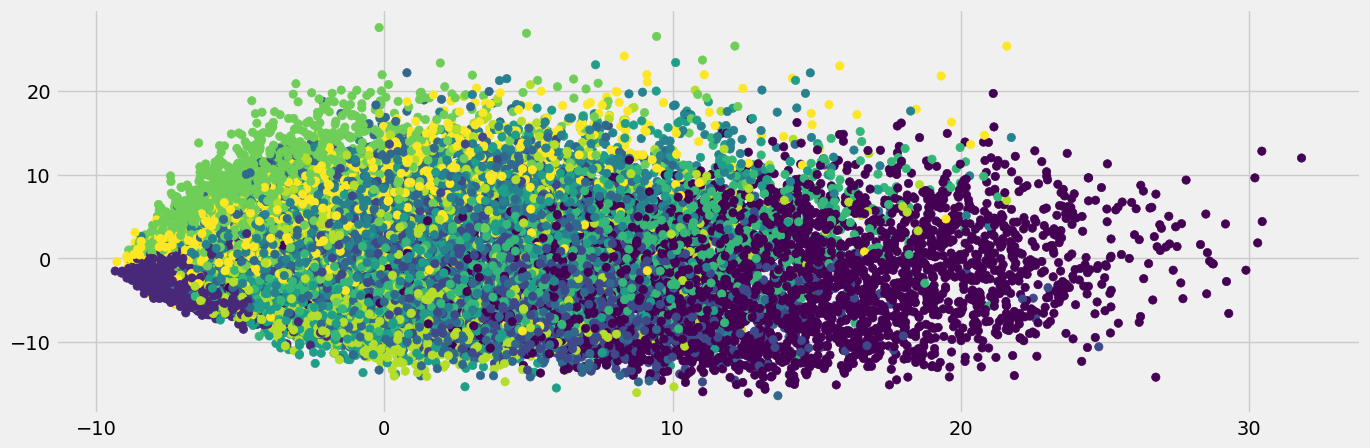

In [31]:
fig = plt.figure(figsize=(15, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data["label"], cmap="viridis")

In [32]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the result (rounded to 4 decimal places)
print("Explained variance ratio:", explained_variance_ratio.round(4))


Explained variance ratio: [0.0575 0.0411]


In [33]:
# Calculate the total explained variance ratio
total_explained_variance_ratio = explained_variance_ratio.sum()

# Print the result (rounded to 4 decimal places)
print("Total explained variance ratio:", total_explained_variance_ratio.round(4))


Total explained variance ratio: 0.0986


In [34]:
x = data.iloc[:, [3, 4]].values
print(x.shape)

(42000, 2)


In [35]:
X_pca_unique, indices = np.unique(pca_data, axis=0, return_index=True)

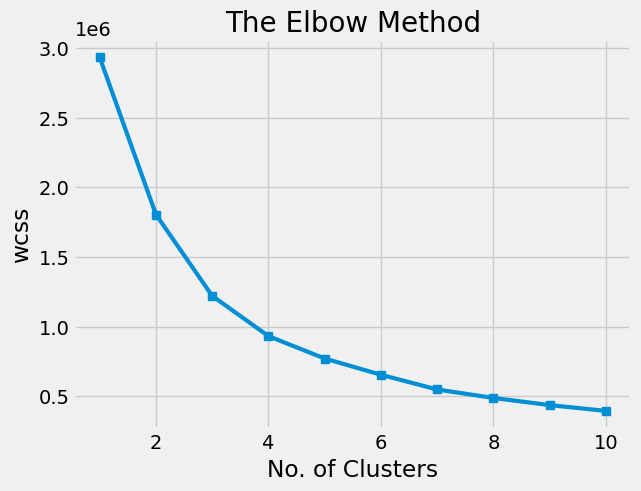

In [36]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X_pca_unique)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, linewidth=3, marker="s")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.ylabel('wcss')
plt.show()

In [37]:
!pip install umap-learn

In [38]:
import umap

# Assume 'data' is your dataset
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation')
embedding = reducer.fit_transform(data)

In [43]:
import matplotlib.pyplot as plt

# Assume 'label' is your target variable
plt.scatter(embedding[:, 0], embedding[:, 1], c=label, cmap='jet')
plt.title('UMAP Visualization')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

NameError: name 'label' is not defined

In [44]:
df = pd.read_csv('digits.csv')

# Проверка наличия целевой переменной 'label'
if 'label' in df.columns:
    label = df['label']
    print("Целевая переменная 'label' найдена")
else:
    print("Целевая переменная 'label' не найдена")

Целевая переменная 'label' найдена


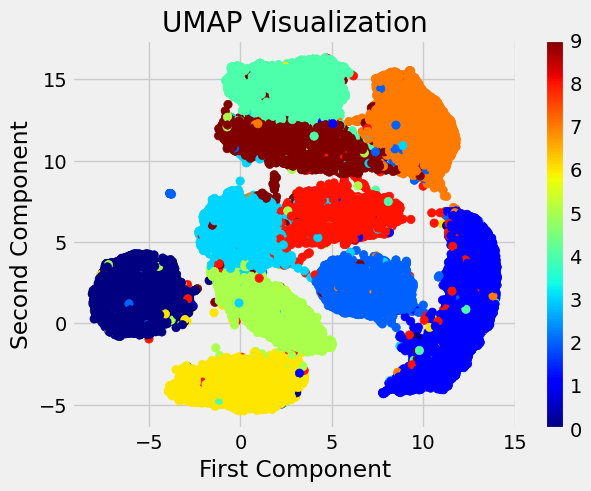

In [45]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=label, cmap='jet')
plt.title('UMAP Visualization')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.colorbar()  # добавляем цветовую шкалу
plt.show()